In [1]:
%matplotlib inline

In [359]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
%%bash
cd data
ls

survey_results_public.csv
survey_results_schema.csv


In [4]:
%%bash
ls

README.md
SO_notebook_2.ipynb
data


In [5]:
df1 = pd.read_csv('data/survey_results_schema.csv')

In [120]:
df2 = pd.read_csv('data/survey_results_public.csv') #Check warning

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
print(df1.shape)
print(df2.shape)

(129, 2)
(98855, 129)


<Container object of 2 artists>

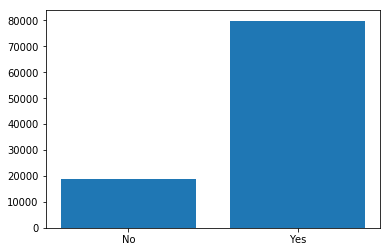

In [9]:
#Hobby Coders
plt.figure(1)
for_plot = df2.groupby(["Hobby"]).size()
for_plot = for_plot.reset_index()
plt.bar(x = for_plot["Hobby"] , height = for_plot[0])

<Container object of 2 artists>

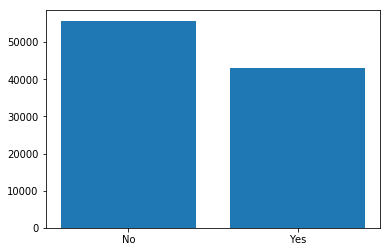

In [10]:
#Open Sources
plt.figure(1)
for_plot = df2.groupby(["OpenSource"]).size()
for_plot = for_plot.reset_index()
plt.bar(x = for_plot["OpenSource"] , height = for_plot[0])

<Container object of 2 artists>

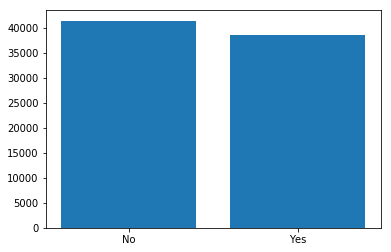

In [100]:
#Of the hobbyisits how many open sourcers and how many not?? ... Hmm not much of difference
plt.figure(1)
for_plot = df2[df2['Hobby'] == "Yes"]
for_plot = for_plot.groupby(["OpenSource"]).size()
for_plot = for_plot.reset_index()
plt.bar(x = for_plot["OpenSource"] , height = for_plot[0])

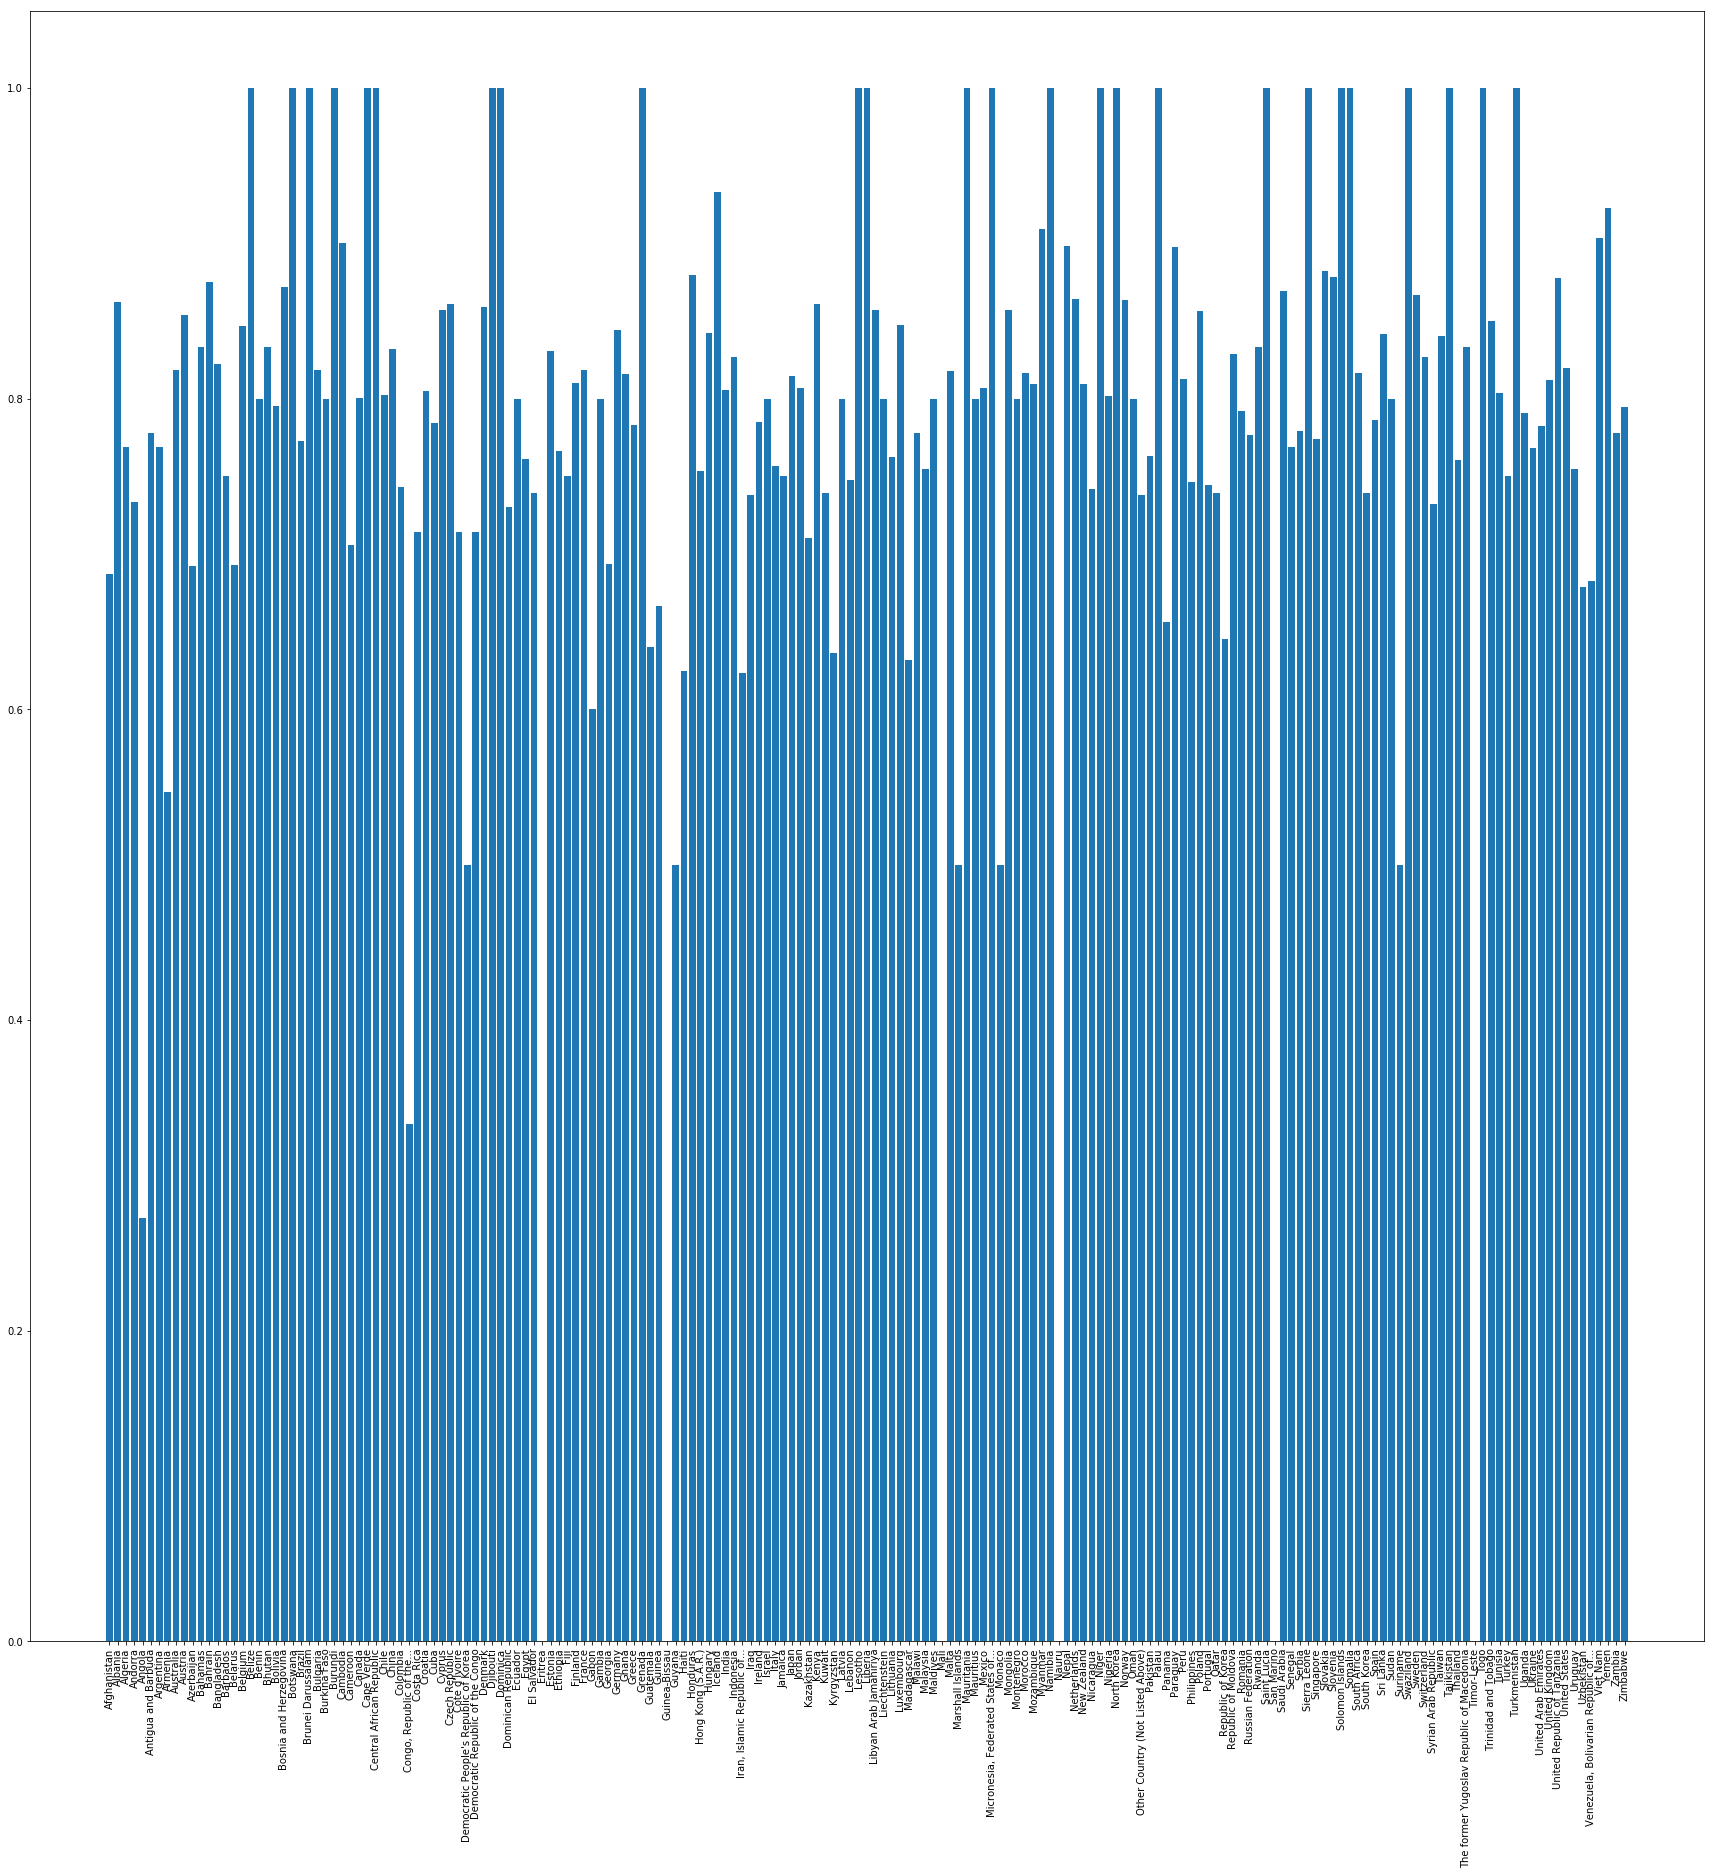

In [121]:
#Where do the most hobbyists come from and non_hobbyists?? ,,, what about zero hobby countries
for_plot = df2
for_plot["Hobby"] = for_plot["Hobby"].map({'Yes': 1, 'No': 0})
for_plot = for_plot.groupby(['Country']).agg({'Hobby':np.mean})
for_plot = for_plot.reset_index()
plt.figure(1 , figsize = (30,30))#This can be converted into geographical plot.
plt.bar(x = for_plot["Country"],height = for_plot["Hobby"])
plt.xticks(rotation = 90)
plt.show()

In [96]:
for_plot["Hobby"][52]

0.0

In [13]:
#We need concentrate on 101 to 116 for the task, as to identify participation/involvement 
#in community according to the objective we need to map relevant columns like, Sex, Country, Job_descreption to these
df1.loc[101:116]

,Column,QuestionText
101,StackOverflowRecommend,How likely is it that you would recommend Stac...
102,StackOverflowVisit,How frequently would you say you visit Stack O...
103,StackOverflowHasAccount,Do you have a Stack Overflow account?
104,StackOverflowParticipate,How frequently would you say you participate i...
105,StackOverflowJobs,Have you ever used or visited Stack Overflow J...
106,StackOverflowDevStory,Do you have an up-to-date Developer Story on S...
107,StackOverflowJobsRecommend,How likely is it that you would recommend Stac...
108,StackOverflowConsiderMember,Do you consider yourself a member of the Stack...
109,HypotheticalTools1,Please rate your interest in participating in ...
110,HypotheticalTools2,Please rate your interest in participating in ...


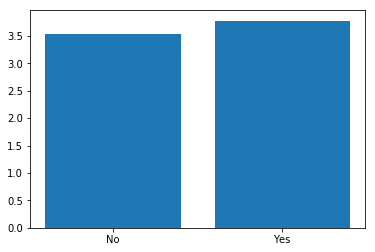

In [77]:
#Not much of a difference, is it??
for_plot = self_taught.groupby(["Hobby"]).agg({'no_of_sources': np.mean})
for_plot = for_plot.reset_index()
for_plot.head()
plt.figure(1)
axes = plt.subplot(111)
plt.bar(x = pd.Categorical(for_plot["Hobby"]) , height = for_plot["no_of_sources"])
plt.xticks([0,1])
a=axes.get_xticks().tolist()
a[0] = "No"
a[1] = "Yes"
axes.set_xticklabels(a)
plt.show()

In [436]:
#Lets filter out people who have Stackoverflow in their learning sources
stack_learners = df2[-df2["SelfTaughtTypes"].isnull()]
stack_learners["is_stack_learner"] = stack_learners["SelfTaughtTypes"].str.contains("Stack Overflow")

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


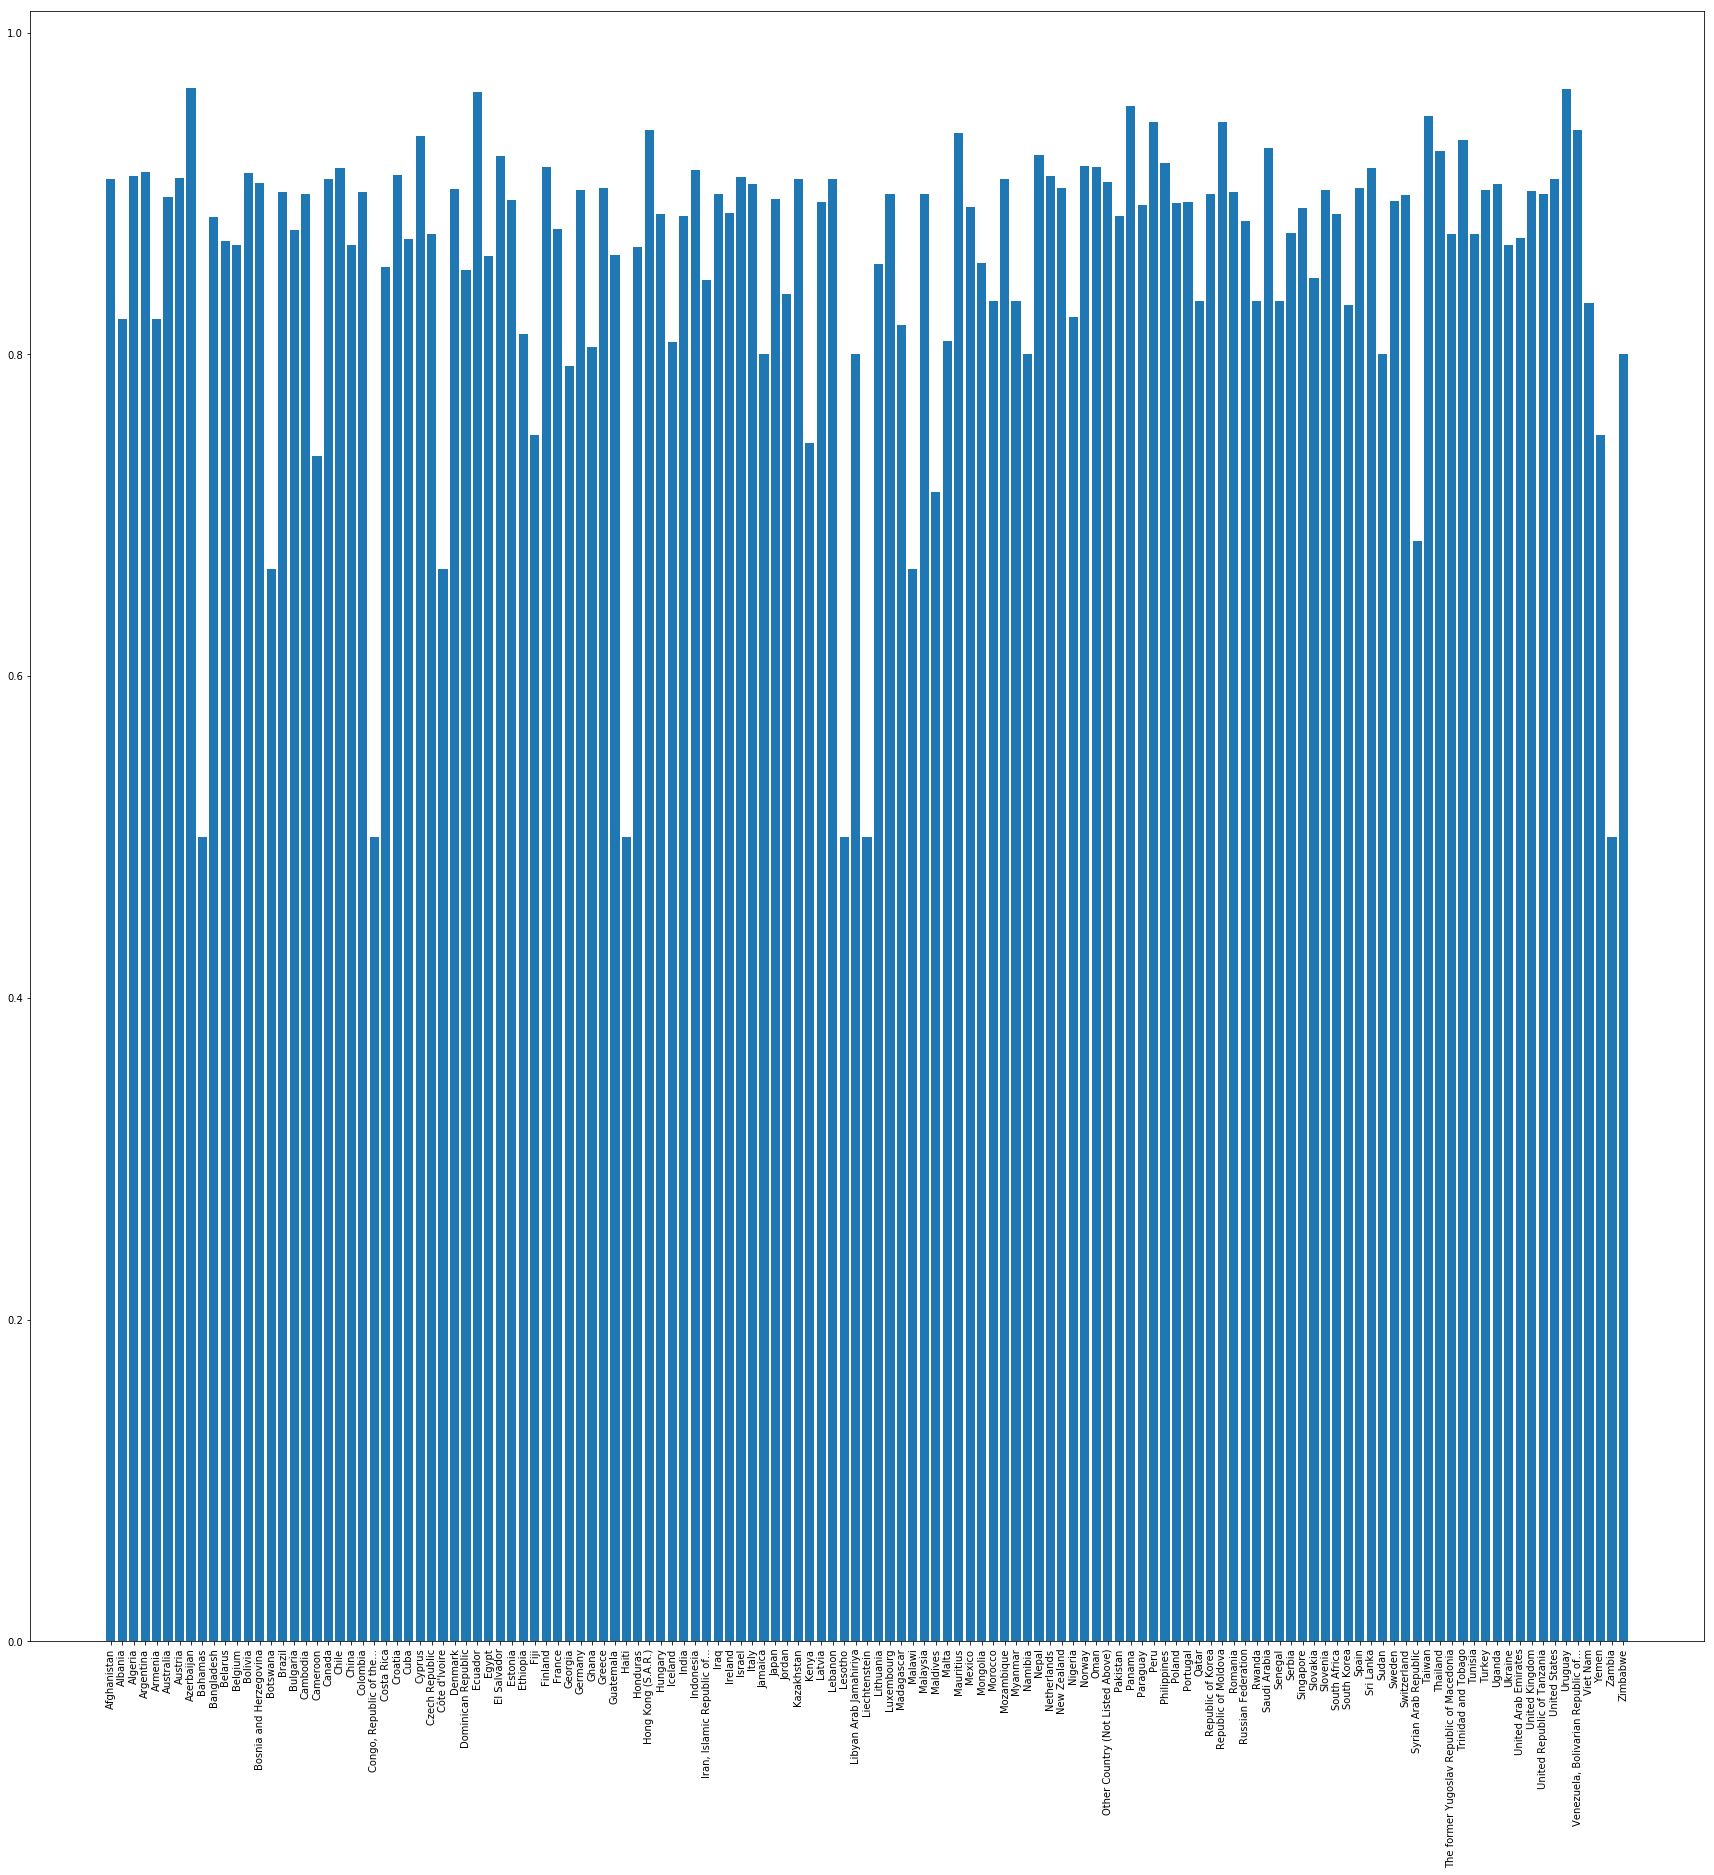

In [138]:
#Which country has most sized Stack_learners
for_plot = stack_learners.groupby(["Country"])["is_stack_learner"].mean()
for_plot = for_plot.reset_index()
for_plot = for_plot[-(for_plot["is_stack_learner"] == 1)] # Removing 100% users
plt.figure(1 , figsize = (30,30))


#Weirdo , there are some countries ,, have exactly 50%  users. Have to check them out,... and no one is below 50% ,, Weird

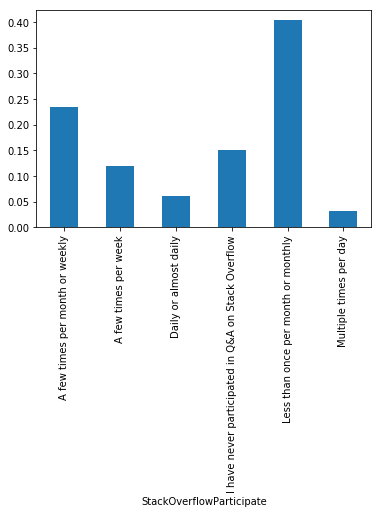

In [212]:
#40% use less than once per month, 25% weekly few times, 15% Never participated
for_plot = stack_learners[stack_learners["is_stack_learner"]]
for_plot = for_plot.groupby(["StackOverflowParticipate"]).size().reset_index()
for_plot[0] = for_plot[0].apply(lambda x : x/for_plot[0].sum())
plt.figure(1)
for_plot.plot(x ="StackOverflowParticipate", kind = "bar" , legend = False)

#So about 55% of users who use stack overflow for learning end up participating very rarely. This subset must be 
#done with further investigation

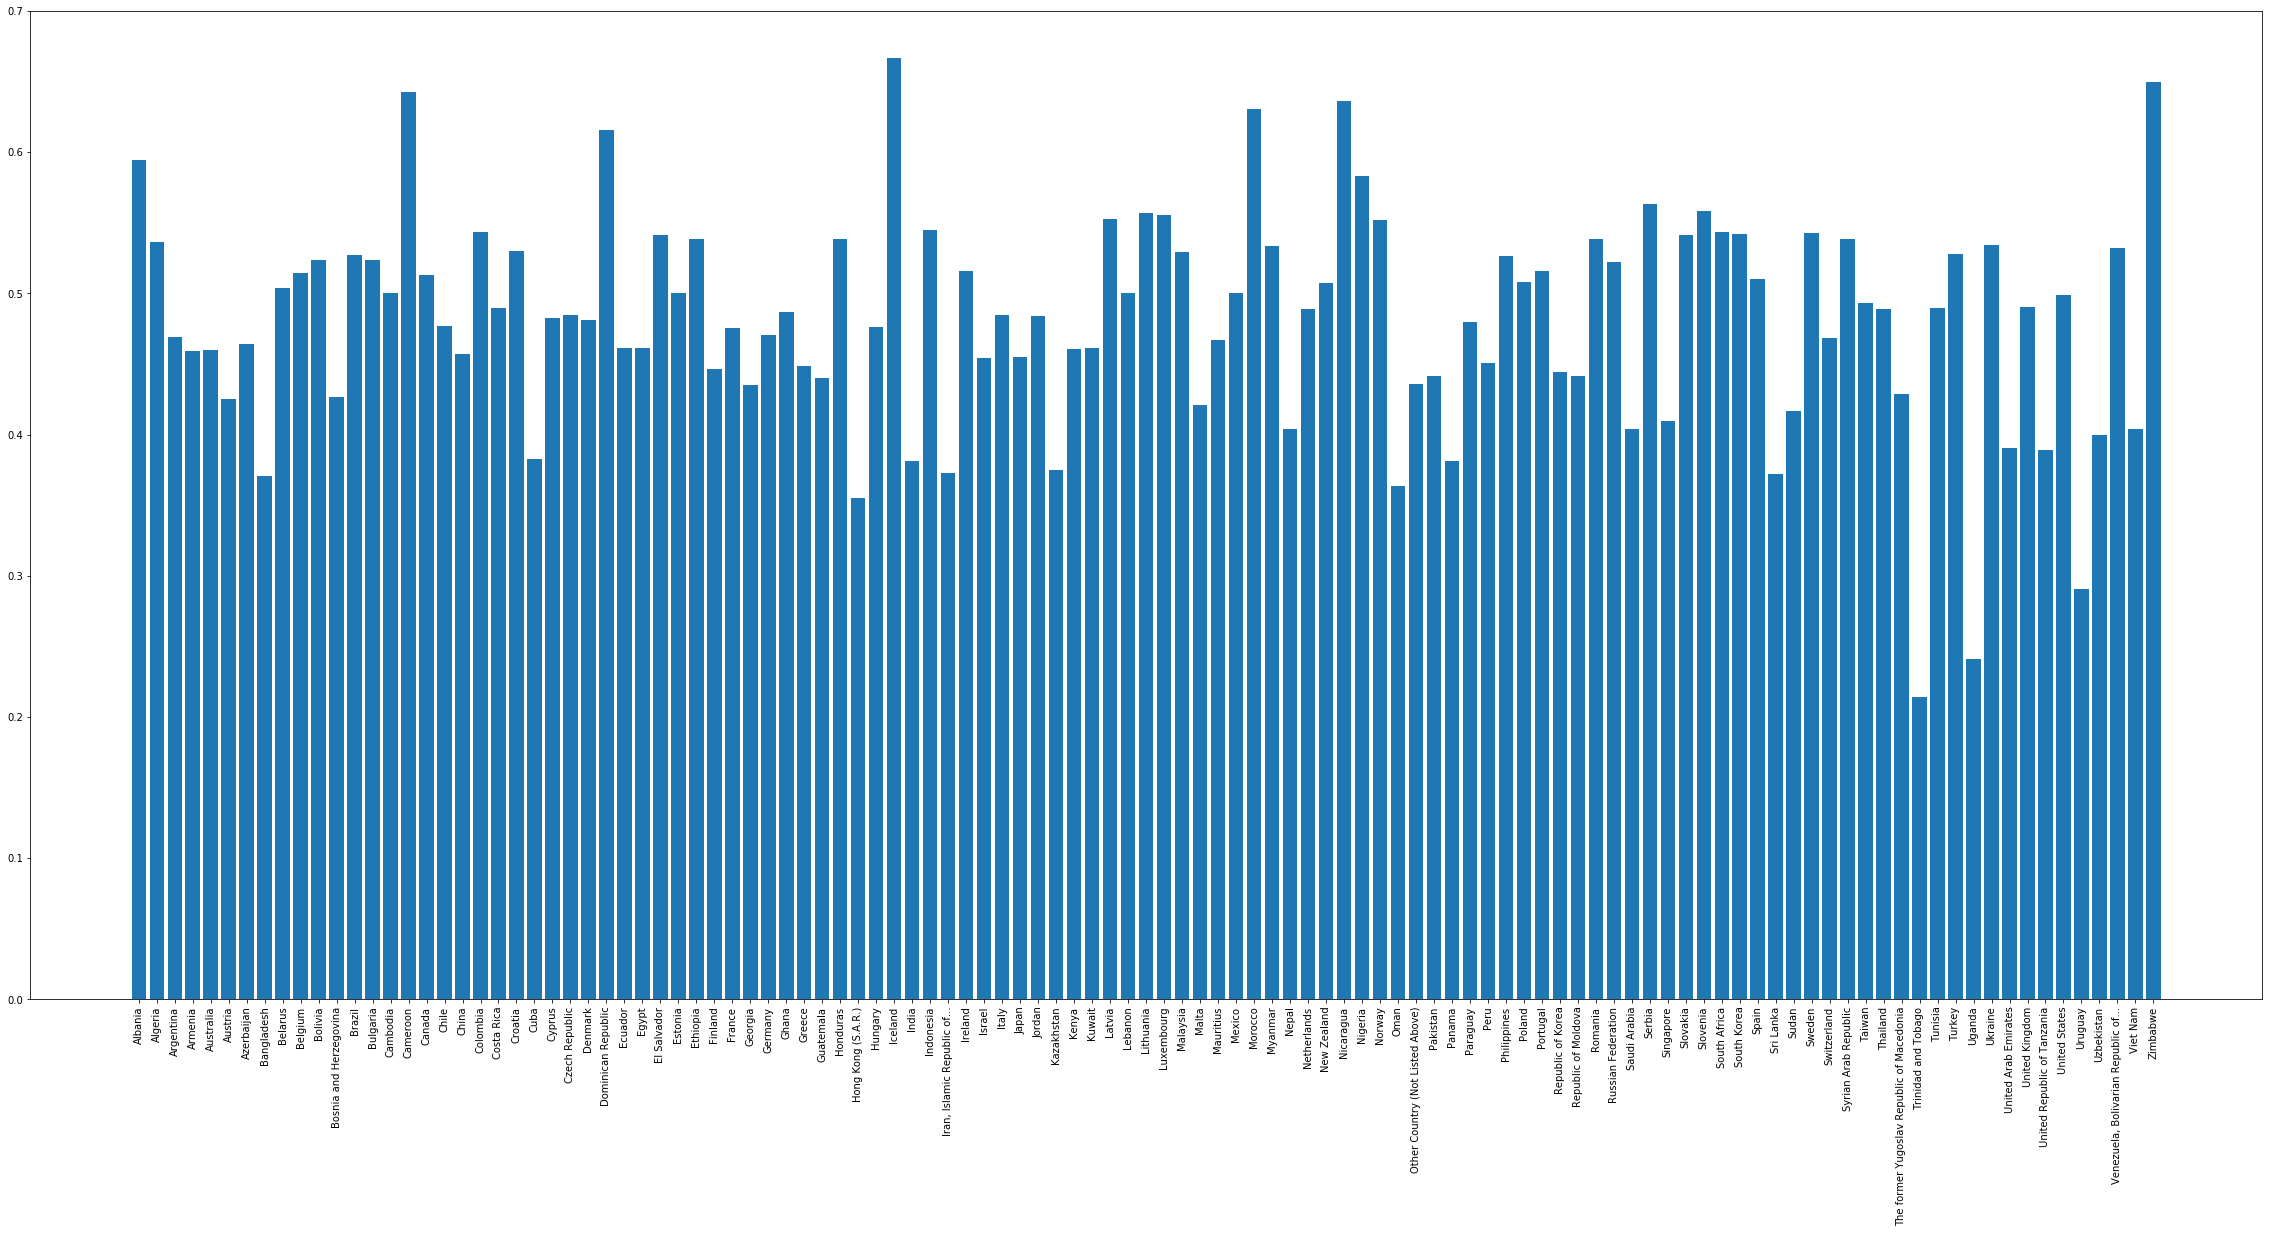

In [571]:
#Lets see the where the learners who dont participate are majorly from keep countries with stack learners > 10??
for_plot = stack_learners[stack_learners["is_stack_learner"]]
for_plot2 = for_plot.groupby(["Country"]).size().reset_index()
for_plot2 = for_plot2[for_plot2[0] > 10]
for_plot2.head()
for_plot = for_plot[for_plot.Country.isin(for_plot2.Country)]
for_plot['is_islamic'] = for_plot.Country.isin(yo_muslim["Name"])
for_plot["Non_Participaters"] = (for_plot['StackOverflowParticipate'] == "I have never participated in Q&A on Stack Overflow") | (for_plot['StackOverflowParticipate'] == "Less than once per month or monthly")
for_plota = for_plot.groupby(["Country"])["Non_Participaters"].mean().reset_index()
plt.figure(1 , figsize = (40,40))
plt.subplot(2,1,1)
plt.bar(x = for_plota["Country"] , height = for_plota["Non_Participaters"])
plt.xticks(rotation = 90)
#plt.subplot(2,1,2)
#for_plotb = for_plot.groupby(["is_islamic"])["Non_Participaters"].mean().reset_index()
#for_plotb.head()
#plt.bar(x = for_plotb["is_islamic"] , height = for_plotb["Non_Participaters"])
plt.show()

In [233]:
#Muslim Countries???
yo_muslim = pd.read_csv("/data/yo_muslim.csv")

In [239]:
for_plot['is_islamic'] = for_plot.Country.isin(yo_muslim["Name"])
#for_plot[["Country","is_islamic"]]

,Country,is_islamic
0,Albania,True
1,Algeria,True
2,Argentina,False
3,Armenia,False
4,Australia,False
5,Austria,False
6,Azerbaijan,True
7,Bangladesh,True
8,Belarus,False
9,Belgium,False


In [222]:
#for_plot[for_plot["Non_Participaters"] >= 10.0]

,Country,Non_Participaters
0,Afghanistan,10
1,Albania,37
2,Algeria,41
5,Argentina,337
6,Armenia,37
7,Australia,1302
8,Austria,463
9,Azerbaijan,28
12,Bangladesh,240
14,Belarus,141


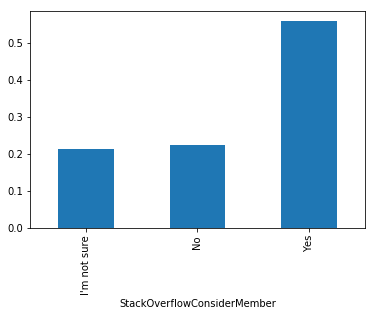

In [173]:
#How many learners consider themsevles to be the members of the Site
for_plot = stack_learners[stack_learners["is_stack_learner"]]
for_plot = for_plot.groupby(["StackOverflowConsiderMember"]).size().reset_index()
for_plot[0] = for_plot[0].apply(lambda x : x/for_plot[0].sum())
plt.figure(1)
for_plot.plot(x ="StackOverflowConsiderMember", kind = "bar" , legend = False)

#Approx 40% of Stack learners dont cosider / not sure themselves as members... to be studied

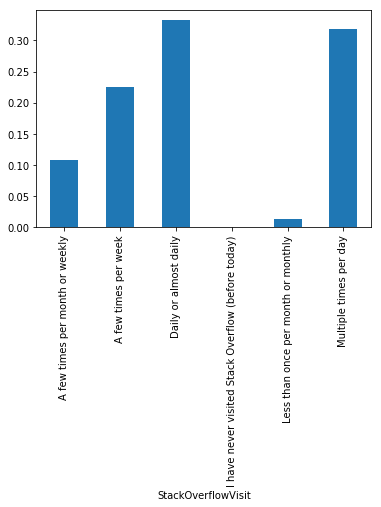

In [174]:
#Check the Visitors who are learners
for_plot = stack_learners[stack_learners["is_stack_learner"]]
for_plot = for_plot.groupby(["StackOverflowVisit"]).size().reset_index()
for_plot[0] = for_plot[0].apply(lambda x : x/for_plot[0].sum())
plt.figure(1)
for_plot.plot(x ="StackOverflowVisit", kind = "bar" , legend = False)

#As expected if thats your learning resource you obviously would visit regularly.

In [176]:
for_plot

,StackOverflowVisit,0
0,A few times per month or weekly,0.108261
1,A few times per week,0.225237
2,Daily or almost daily,0.332140
3,I have never visited Stack Overflow (before to...,0.001259
4,Less than once per month or monthly,0.014224
5,Multiple times per day,0.318880


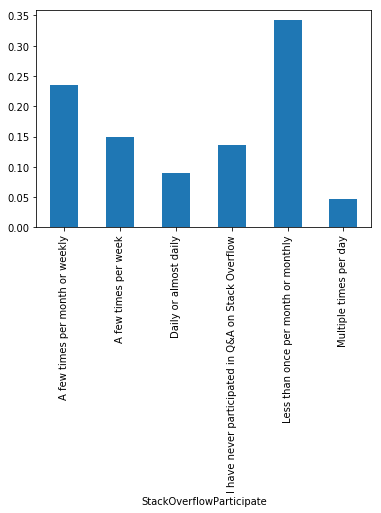

In [177]:
#Lets consider daily visitors and multiple time daily visitors what proportion of them participate
for_plot = stack_learners[stack_learners["is_stack_learner"]]
for_plot = for_plot[(for_plot["StackOverflowVisit"] == "Daily or almost daily") | (for_plot["StackOverflowVisit"] == "Multiple times per day")]
for_plot = for_plot.groupby(["StackOverflowParticipate"]).size().reset_index()
for_plot[0] = for_plot[0].apply(lambda x : x/for_plot[0].sum())
plt.figure(1)
for_plot.plot(x ="StackOverflowParticipate", kind = "bar" , legend = False)
#Daily visitors only 15% participate in proportion they visit. Whats wrong??

# Some real shit

In [ ]:
code = {'Extremely interested':4 , 'Very interested' :3 , 'Somewhat interested' : 1 , 'A little bit interested' : 2 , 'Not at all interested' :0 }

In [255]:
tempo = df1[(df1["Column"].str.contains("StackOverflow")) | (df1["Column"].str.contains("Hypothetical"))].reset_index()

In [276]:
tempo.loc[9][2] #Negative 1

'Please rate your interest in participating in each of the following hypothetical tools on Stack Overflow, where 1 is not at all interested and 5 is extremely interested. A private area for people new to programming'

In [284]:
tempo.loc[0][2] #Postive 1

'How likely is it that you would recommend Stack Overflow overall to a friend or colleague? Where 0 is not likely at all and 10 is very likely.'

In [266]:
tempo.loc[2][2] #Positive 0.25

'Do you have a Stack Overflow account?'

In [268]:
tempo.loc[3][2] #Positive 2

'How frequently would you say you participate in Q&A on Stack Overflow? By participate we mean ask, answer, vote for, or comment on questions.'

In [269]:
tempo.loc[7][2] #Positive 1.5

'Do you consider yourself a member of the Stack Overflow community?'

In [320]:
code  =  {'Extremely interested' :4 , 'Very interested' :3 , 'Somewhat interested' : 2 , 'A little bit interested' : 1 , 'Not at all interested' :0 }

In [321]:
code_reco = {'10 (Very Likely)' :4 , '7' :3 , '9' : 4 , '8' : 3,  '0' : 0 , '1' : 0 , '6' : 2 , '5' : 2 , '4' : 1.5, '3':1 , '2': 1 }

In [495]:
stack_learners = df2[-df2["SelfTaughtTypes"].isnull()]
stack_learners["is_stack_learner"] = stack_learners["SelfTaughtTypes"].str.contains("Stack Overflow")

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [496]:
#Lets do for stack learners first
#stack_learners_only = stack_learners[stack_learners["is_stack_learner"]]
stack_learners["Ease of Participation"] = -1 * stack_learners["HypotheticalTools2"].map(code)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [497]:
cutting = stack_learners["StackOverflowRecommend"].map(code_reco)

In [498]:
stack_learners["Ease of Participation"] += cutting

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [502]:
accounter = stack_learners["StackOverflowHasAccount"].map({'Yes' : 1 , 'No' : 0 , 'I\'m not sure / I can\'t remember' : 0}) *4 * 0.25

In [503]:
stack_learners["Ease of Participation"] += accounter

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [504]:
participate_map = {'I have never participated in Q&A on Stack Overflow':0, 'Less than once per month or monthly' :1 , 'A few times per month or weekly' : 2 ,'A few times per week' : 3 ,'Daily or almost daily' : 4, 'Multiple times per day' : 4  }

In [505]:
participate_map

{'A few times per month or weekly': 2,
 'A few times per week': 3,
 'Daily or almost daily': 4,
 'I have never participated in Q&A on Stack Overflow': 0,
 'Less than once per month or monthly': 1,
 'Multiple times per day': 4}

In [506]:
participates = stack_learners["StackOverflowParticipate"].map(participate_map)

In [507]:
pd.unique(participates)

array([ 0.,  2.,  1.,  3., nan,  4.])

In [508]:
stack_learners["Ease of Participation"] += (participates * 2)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [509]:
memberso = stack_learners["StackOverflowConsiderMember"].map({'Yes' : 1 , 'No' : 0 , 'I\'m not sure' : 0}) * 4 * 1.5

In [510]:
stack_learners["Ease of Participation"] += memberso

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


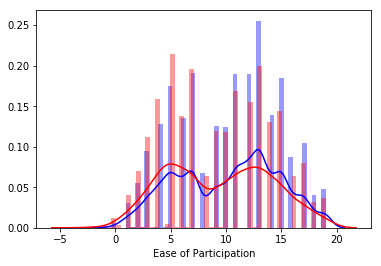

In [524]:
plt.figure(1)
sns.distplot( stack_learners[stack_learners["is_stack_learner"] == 1]["Ease of Participation"].dropna() , color="blue", label="Use Stack" , bins  = 50)
sns.distplot( stack_learners[stack_learners["is_stack_learner"] == 0]["Ease of Participation"].dropna() , color="red", label="Dont use stack" , bins = 50)


In [525]:
stack_learners['is_islamic'] = stack_learners.Country.isin(yo_muslim["Name"])

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


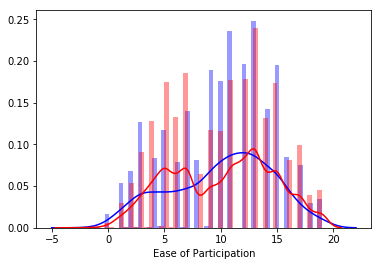

In [526]:
plt.figure(1)
sns.distplot( stack_learners[stack_learners["is_islamic"] == 1]["Ease of Participation"].dropna() , color="blue", label="Use Stack" , bins  = 50)
sns.distplot( stack_learners[stack_learners["is_islamic"] == 0]["Ease of Participation"].dropna() , color="red", label="Dont use stack" , bins = 50)


In [531]:
#Shifting to get log scale ---- for getting concentrated peak.
temp = np.log(stack_learners["Ease of Participation"] + 5)

In [532]:
stack_learners["temp"] = temp

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


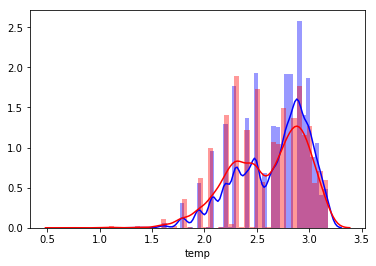

In [534]:
plt.figure(1)
sns.distplot( stack_learners[stack_learners["is_stack_learner"] == 1]["temp"].dropna() , color="blue", label="Use Stack" , bins  = 50)
sns.distplot( stack_learners[stack_learners["is_stack_learner"] == 0]["temp"].dropna() , color="red", label="Dont use stack" , bins = 50)


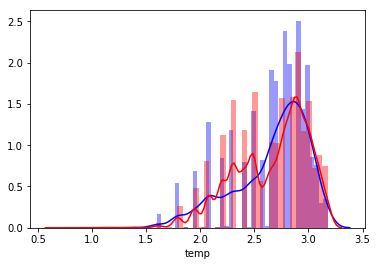

In [535]:
plt.figure(1)
sns.distplot( stack_learners[stack_learners["is_islamic"] == 1]["temp"].dropna() , color="blue", label="Use Stack" , bins  = 50)
sns.distplot( stack_learners[stack_learners["is_islamic"] == 0]["temp"].dropna() , color="red", label="Dont use stack" , bins = 50)


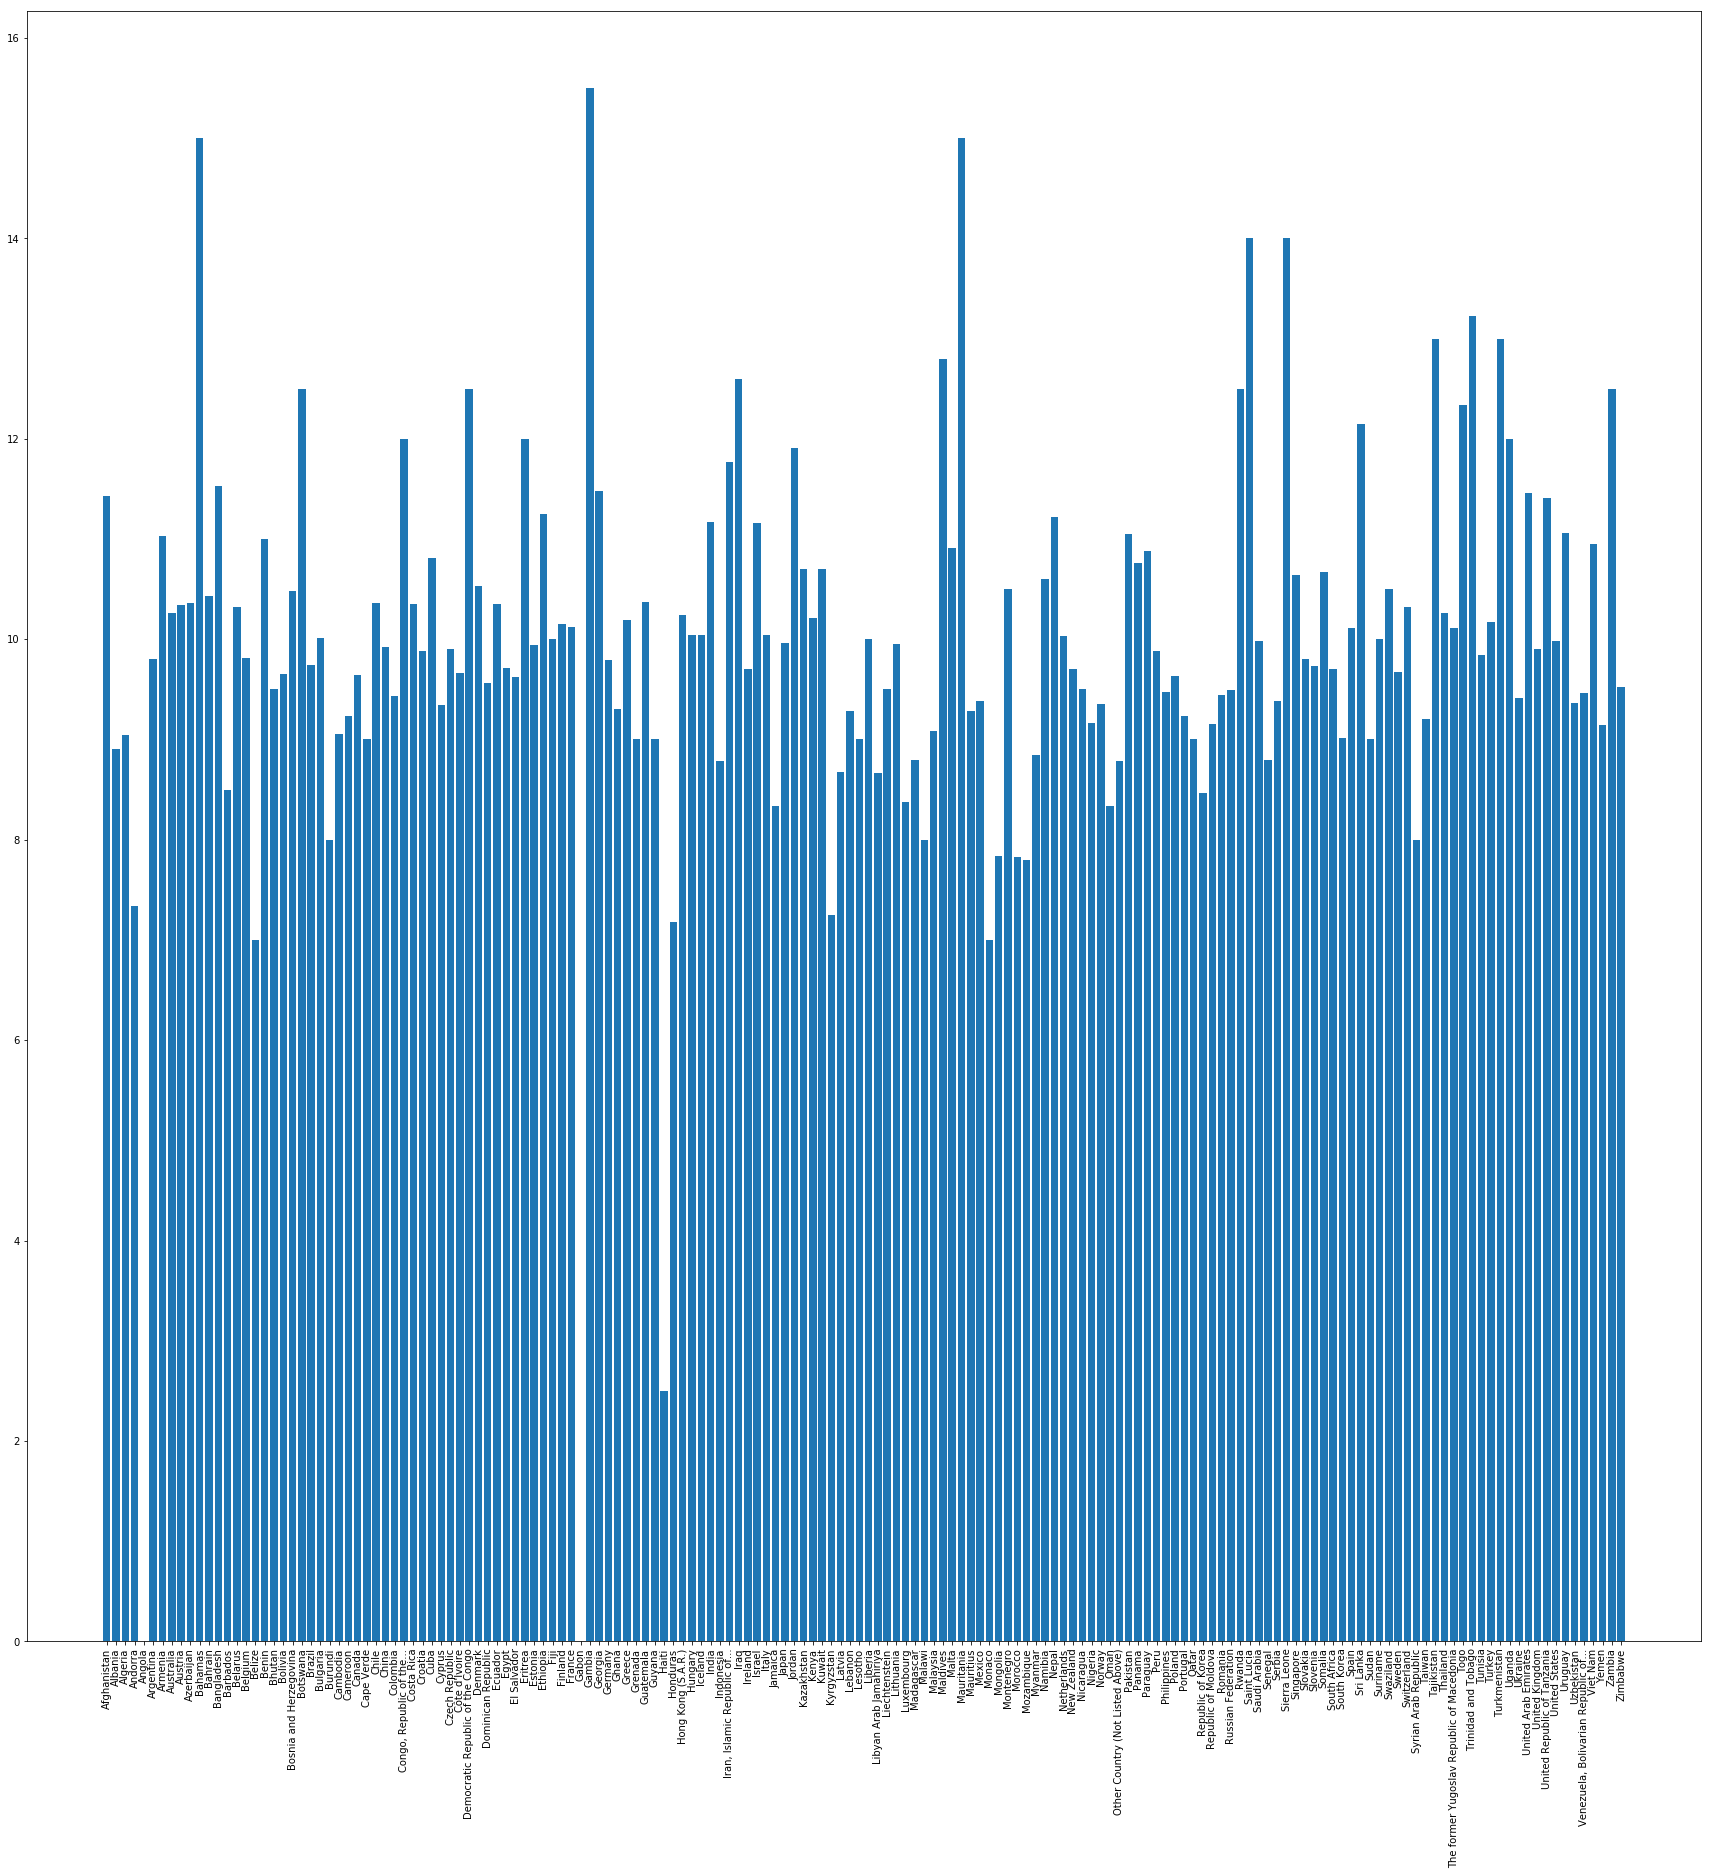

In [549]:
for_plot = stack_learners.groupby(["Country"])["Ease of Participation"].mean().reset_index()
plt.figure(7 , figsize= (30,30))
plt.bar(x = for_plot["Country"] , height = for_plot["Ease of Participation"])
plt.xticks(rotation = 90)
plt.show()

In [558]:
#oooh , too many sexes uh??
stack_learners[stack_learners["SexualOrientation"] == 'Straight or heterosexual;Gay or Lesbian;Bisexual or Queer']["SexualOrientation"]

2080     Straight or heterosexual;Gay or Lesbian;Bisexu...
4427     Straight or heterosexual;Gay or Lesbian;Bisexu...
26125    Straight or heterosexual;Gay or Lesbian;Bisexu...
37332    Straight or heterosexual;Gay or Lesbian;Bisexu...
60907    Straight or heterosexual;Gay or Lesbian;Bisexu...
61409    Straight or heterosexual;Gay or Lesbian;Bisexu...
68127    Straight or heterosexual;Gay or Lesbian;Bisexu...
70197    Straight or heterosexual;Gay or Lesbian;Bisexu...
73497    Straight or heterosexual;Gay or Lesbian;Bisexu...
73631    Straight or heterosexual;Gay or Lesbian;Bisexu...
73781    Straight or heterosexual;Gay or Lesbian;Bisexu...
81354    Straight or heterosexual;Gay or Lesbian;Bisexu...
83499    Straight or heterosexual;Gay or Lesbian;Bisexu...
84710    Straight or heterosexual;Gay or Lesbian;Bisexu...
84997    Straight or heterosexual;Gay or Lesbian;Bisexu...
85113    Straight or heterosexual;Gay or Lesbian;Bisexu...
Name: SexualOrientation, dtype: object

In [572]:
stack_learners["is_windows"] = (stack_learners["OperatingSystem"] == "Windows")

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


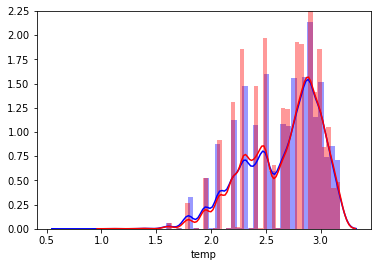

In [573]:
plt.figure(1)
sns.distplot( stack_learners[stack_learners["is_windows"] == 1]["temp"].dropna() , color="blue", label="Use Stack" , bins  = 50)
sns.distplot( stack_learners[stack_learners["is_windows"] == 0]["temp"].dropna() , color="red", label="Dont use stack" , bins = 50)

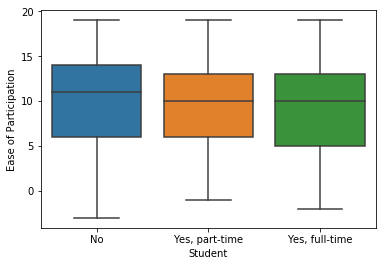

In [579]:
#pd.unique(stack_learners["Student"])
plt.figure(1)
sns.boxplot(x = stack_learners["Student"] , y = stack_learners["Ease of Participation"])
plt.show()

In [600]:
ww2 = pd.DataFrame({col:vals["Ease of Participation"] for col, vals in stack_learners.groupby(["YearsCoding"])})
# find and sort the median values in this new dataframe
meds = ww2.median().sort_values()

In [601]:
meds

0-2 years            8.0
3-5 years           10.0
12-14 years         11.0
15-17 years         11.0
6-8 years           11.0
9-11 years          11.0
18-20 years         12.0
21-23 years         12.0
24-26 years         12.0
27-29 years         12.0
30 or more years    12.0
dtype: float64

# Bro please try to rearrange increasing according to Median, awesome conclusion

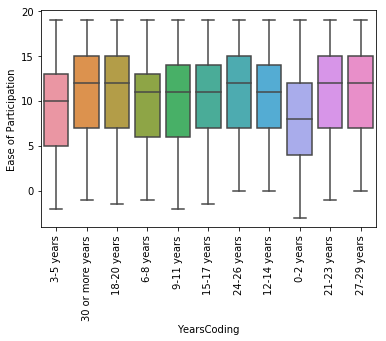

In [603]:
plt.figure(1)
sns.boxplot(x = stack_learners["YearsCoding"] , y = stack_learners["Ease of Participation"])# , order = meds)
plt.xticks(rotation = 90)
#pol.set_xticklabels(rotation=90)
plt.show()

In [581]:
df2.columns.values

array(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student',
       'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize',
       'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction',
       'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus',
       'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3',
       'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7',
       'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1',
       'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4',
       'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7',
       'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10',
       'AssessBenefits11', 'JobContactPriorities1',
       'JobContactPriorities2', 'JobContactPriorities3',
       'JobContactPriorities4', 'JobContactPriorities5',
       'JobEmailPriorities1', 'JobEmailPriorities2',
       'JobEmailPriorities3', 'JobEmailPriorities4',
       'JobEmailPriorities5', 'JobEmailPriorities6',
       'JobE

In [582]:
df1

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree..."
5,Employment,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,UndergradMajor,You previously indicated that you went to a co...
8,CompanySize,Approximately how many people are employed by ...
9,DevType,Which of the following describe you? Please se...


In [493]:
stack_learners = df2[-df2["SelfTaughtTypes"].isnull()]
stack_learners["is_stack_learner"] = stack_learners["SelfTaughtTypes"].str.contains("Stack Overflow")

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


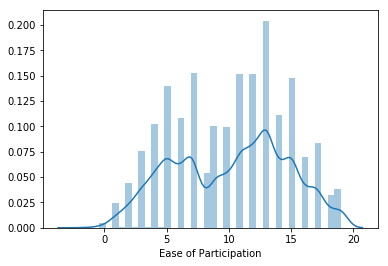

In [408]:
plt.figure(1)
sns.distplot(stack_learners_only["Ease of Participation"][-np.isnan(stack_learners_only["Ease of Participation"])] , bins = 40)  
plt.show()#

In [409]:
for_learners = for_learners[-np.isnan(for_learners["Ease of Participation"])] #remove nan's

In [411]:
for_learners[for_learners["is_stack_learner"] == 0]

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,is_stack_learner,Ease of Participation
